[*********************100%%**********************]  1 of 1 completed

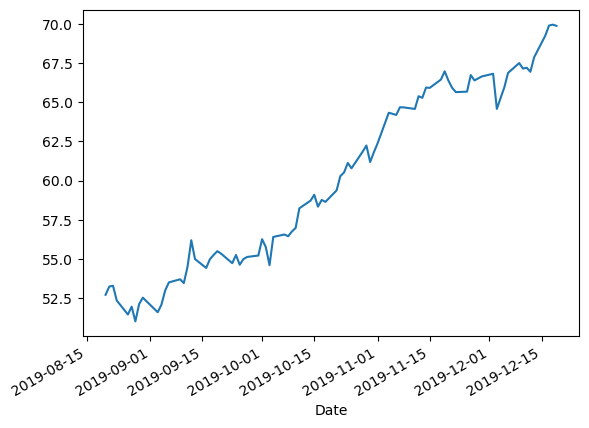

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


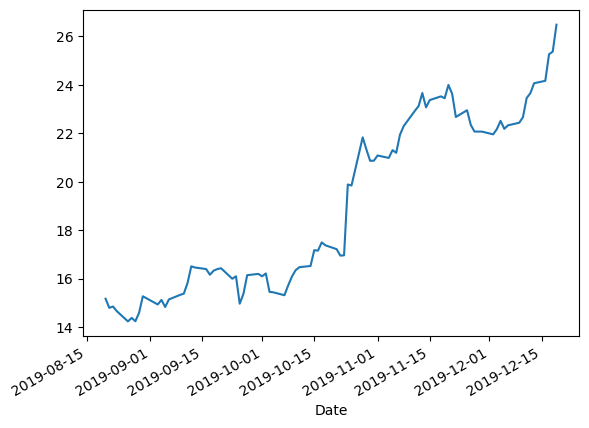

In [15]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
# %matplotlib inline



start = ('2019-8-20')
end = ('2019-12-20')

df = web.DataReader("AAPL", start, end)


df['Open'].plot()
plt.show()

start2 = datetime.datetime(2012,1,1)
end2 = datetime.datetime(2017,1,1)
tesla = web.DataReader('TSLA',start,end)
tesla['Open'].plot()

df2=web.DataReader("TSLA",start2,end2)

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['SCHAND.NS', 'TATAPOWER.NS', 'ITC.NS']
from datetime import datetime
startdate = datetime(2022,12,1)
enddate = datetime(2022,12,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%%**********************]  3 of 3 completed


In [3]:
import pandas_datareader as pdr

import pandas as pd

from datetime import datetime

import yfinance as yf

## Download 

df_tesla=yf.download('TSLA')

df_tesla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-05-20,177.559998,177.750000,173.520004,174.949997,174.949997,61727400
2024-05-21,175.509995,186.880005,174.710007,186.600006,186.600006,115266500
2024-05-22,182.850006,183.800003,178.119995,180.110001,180.110001,88313500


In [1]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
from IPython.display import display

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [6]:
tesla = yf.Ticker("TSLA")

In [7]:
tesla_data = tesla.history(period="max")

In [8]:
tesla_data.reset_index(inplace=True) 
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

In [10]:

soup = BeautifulSoup(html_data, 'html5lib')

In [11]:
#We create an empty dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#We extract the desired data from the 'soup' object and save it in the dataframe
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

/var/folders/x_/v92_p0794lvft23114jgf4d80000gn/T/ipykernel_43077/99757628.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/x_/v92_p0794lvft23114jgf4d80000gn/T/ipykernel_43077/99757628.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/x_/v92_p0794lvft23114jgf4d80000gn/T/ipykernel_43077/99757628.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/x_/v92_p0794lvft23114jgf4d80000gn/T/ipykernel_43077/99757628.py:9: Futur

In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

#OPTIONAL: Execute the following lines to remove an null or empty strings in the Revenue column.
#tesla_revenue.dropna(inplace=True)
#tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.head()

/var/folders/x_/v92_p0794lvft23114jgf4d80000gn/T/ipykernel_43077/3614861797.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [13]:
make_graph(tesla_data, tesla_revenue, 'Tesla')
